# Higgs Boson Particle Detection

## 1) Model comparison
I compared four classifiers: kNN, Decision Trees, Random Forests, and Gradient Boosted trees. I beleive the Gradient Boosted trees works the best, so I used an ensemble of those classifiers in my final model. I used the area under each model's ROC curve to determine this. The higher the area, the better I perceive the model to be. The Gradient Boosted trees resulted in the highest AUROC value, and so I used this model as the estimator in the final ensemble.

## 2) Data used for training
I used 70% of the data in train.csv for training, and the other 30% for validation. In the hyperparameter testing phase, I split the 70% into k subsections, to train models with different hyperparameters. For the final model I submitted to Kaggle, I used an ensemble of Gradient Boosted trees and trained it on the entire 70% training data rather than the k-split subsection. 

## 3) Hyperparameter Selection
I chose the hyperparameters by systematically running through many different values and choosing the hyperparameter value that resulted in the highest AUROC value (evaluated on a kFold split of the training dataset). 

*Note:*
- Kaggle was taking too long to run the Gradient Boosted trees, so I ran it on my own computer. While optimizing the hyperparameters for my Bagging ensemble of Gradient Boosted trees, my computer crashed. So I cut the hyperparameter testing early and chose the best hyperparameters that I had seen so far. I didn't want to run the whole notebook again so I hard-coded the hyperparameter values in the last cell to submit the file.

# Model Selection and Hyperparameter Optimization

## Hyperparameter Optimization
In this notebook, I perform hyperparameter optimization on 4 models with the help of the kFold cross validation technique. I do this using kFold splitting and ROC curves. Instead of performing standard kFold validation to validate a model's performance (k-1 sets for training and the 1 held out set for validation) I do the following: 

1) Import *training* data only

2) Split training data **further** into training and validation sets. This validation set will remain *untouched* for now

3) Split the training set **further** into k subsets with 1 held-out validation set (kFolds)

4) On each iteration of the kFolds technique: 
    - k-1 sets are used for training the model with hyperparameter(n)
    - 1 held-out set is used to calculate the AUROC values of the model with hyperparameter(n) 
    - Change the value of n
    
5) Choose the hyperparameter value that resulted in the highest AUROC value

6) Evaluate the model with optimized hyperparameters on the *untouched* validation set 

And so, rather than using kFold cross-validation to validate the accuracy of a single model across k subsets, I am using each subset to test the model with **different** hyperparameters. I then select the hyperparameter value which produced the highest AUROC value and retrain the model using this value. Afterwards, I validated the model's performance on the *untouched* validation set from the first split I performed on the training data (step 2). 

What this approach does:
* Prevents model overfitting by *first* performing hyperparameter optimization *then* validating the model on an untouched set 
* Model validation performed on the untouched validation set 

What this approach **does not** do: 
* Actual kFold cross validation

## Model Validation
And so, although the above steps may be misleading because I use the kFolds technique, I do not use kFold splitting to *validate* my model, but rather to test and select the optimal hyperparameter. I then perform a simple one-step validation using the set I split off in step 2.

## Model Selection and Performance Metrics
I performed the above hyperparameter optimization and validation strategies on 4 learning algorithms: kNearestNeighbors, Decision Trees, Random Forests, and Gradient Boosting. The metric I used to evaluate each model's performance is their AUROC values as derived in step 6. I compared all values and chose the model with the higher AUROC value.

To summarize my results, I found k = 23 to be the optimal k-value for kNN, and max_depth = 7 to be optimal for my decision tree. Thinking about this now, if I wanted to optimize the models further I could repeat the same process with other hyperparameters to try to improve performance. However, I think I chose the most impactful hyperparameters to adjust because of the large resulting impact in AUROC values.

## Result of Analysis 
The winning model turned out to be Gradient Booosted Trees: with an AUROC value of .79 compared to the .63 of my first model kNN. This is clearly visually represented by the graphed ROC curves that show the large difference in area under the curve between the two models. 

This analysis has shown me why it's so important to 1) Pick the most effective model, 2) Optimize it's hyperparameters, and 3) Evaluate its performance on a validation set. These three steps maximize your model's effectiveness, prevent overfitting, and make sure you pick the best model for the situation. I will definitely be using these techniques to compare model performance in the future. 

*Notes:*
- Because of randomized data splits, running the notebook gives slightly different values for the best hyperparameters each time. My code automatically uses the 'best' value to create the final model, and so the models' performance may vary slightly each time the notebook is ran. 
- Originally I was performing between 10 and 15 splits with the kFold technique, and evaluating 10-15 different hyperparameters. After the completion of this notebook, while writing this top portion, I had the idea that since this is such a large dataset, I could do something super large such as 100 splits. Testing 100 different hyperparameters might actually give me more optimal values than testing with 10-15, so I tried this out. Very interestingly, even testing 100 different k-values with kNN resulted in an optimal k very close to the one I found testing only 15. The same exact thing can be said about the decision tree.

*by Chinenye Ndili*

# Import packages and dataset

In [7]:
import numpy as np # linear algebra
import matplotlib.pylab as plt # Plotting
import sklearn # Machine learning models.
from sklearn.neighbors import KNeighborsClassifier as KNN
import sklearn.metrics # Area under ROC curve calculations. 
from sklearn.model_selection import train_test_split as tts # Train test split 
from sklearn.model_selection import KFold # KFold cross validation 
import pandas as pd # Quick dataframe previewing 



filename = 'train.csv'


data = np.loadtxt(filename, skiprows=1, delimiter=',')

X = data[:,1:]
Y = data[:,0:1]

# Split off validation set, size = 30% validation 70% training
Xtrain, Xvalid, Ytrain, Yvalid = tts(X, Y, test_size=.3)

# Optimize and Validate kNN model

Validation AUROC for KNN with k = 3: 0.5735221663050889
Validation AUROC for KNN with k = 5: 0.5831376891298831
Validation AUROC for KNN with k = 7: 0.601283831823557
Validation AUROC for KNN with k = 9: 0.6113764598788977
Validation AUROC for KNN with k = 11: 0.6258952725482667
Validation AUROC for KNN with k = 13: 0.6241510841309229
Validation AUROC for KNN with k = 15: 0.6276705689689512
Validation AUROC for KNN with k = 17: 0.6246607756867675
Validation AUROC for KNN with k = 19: 0.6330369039134881
Validation AUROC for KNN with k = 21: 0.629321399887292
Validation AUROC for KNN with k = 23: 0.6283976383459587
Validation AUROC for KNN with k = 25: 0.6289976406399764
Validation AUROC for KNN with k = 27: 0.6217364371461696
Validation AUROC for KNN with k = 29: 0.6230408067175293
Validation AUROC for KNN with k = 31: 0.6415809370535687
Max AUROC value at k = 31. AUROC value with optimized kValue on validation set = 0.633471283860941


Text(0.5, 1.0, 'kNN with k = 31')

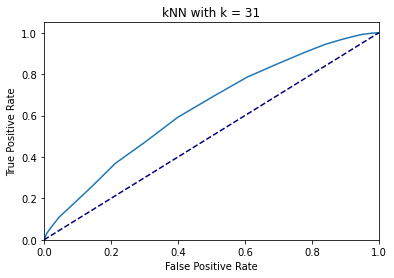

In [23]:
# Split training set with KFoldValidation in order to perform hyperparameter optimization
kf = KFold(n_splits = 15)
kFolds = kf.split(Xtrain)

# Set 'k' in kNN algo, declare dictionary to hold AUROC values {kval : auroc}
k = 1
aurocs = {}


# Use kFold technique on training set to test models with different values of k starting at 3
for train_index, test_index in kFolds:
    k += 2
    model = KNN(n_neighbors=k)
    model.fit(Xtrain[train_index], Ytrain[train_index][:,0])
    predictions = model.predict_proba(Xtrain[test_index])
    val = sklearn.metrics.roc_auc_score(Ytrain[test_index], predictions[:,1])
    print(f'Validation AUROC for KNN with k = {k}: {val}')
    aurocs[k] = val

# Choose optimized k-value and evaulate AUROC value on the untouched validation set (note: not the same validation set used in kFolds technique)
model = KNN(n_neighbors=max(aurocs, key=aurocs.get)) # Set model with optimized k-value
model.fit(Xtrain[train_index], Ytrain[train_index][:,0]) # Fit model on the training set
predictions = model.predict_proba(Xvalid) # Predict on validation set
val = sklearn.metrics.roc_auc_score(Yvalid, predictions[:,1]) # Calculate AUROC value
print(f'Max AUROC value at k = {max(aurocs, key=aurocs.get)}. AUROC value with optimized kValue on validation set = {val}') # Print AUROC value on untouched validation set

# Plot ROC curve.
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Yvalid, predictions[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'kNN with k = {max(aurocs, key=aurocs.get)}')

# Evaluating Alternate Model (Decision Trees)

Validation AUROC for Decision Tree with max_depth = 3: 0.6787634602449952
Validation AUROC for Decision Tree with max_depth = 5: 0.7080416212334082
Validation AUROC for Decision Tree with max_depth = 7: 0.7415215073925665
Validation AUROC for Decision Tree with max_depth = 9: 0.7385984910042147
Validation AUROC for Decision Tree with max_depth = 11: 0.6912678417914394
Validation AUROC for Decision Tree with max_depth = 13: 0.6705609185854986
Validation AUROC for Decision Tree with max_depth = 15: 0.6173539300550775
Validation AUROC for Decision Tree with max_depth = 17: 0.6165747499403743
Validation AUROC for Decision Tree with max_depth = 19: 0.5992899330336956
Validation AUROC for Decision Tree with max_depth = 21: 0.6045141402053676
Max AUROC value at max_depth = 7. AUROC value with optimized kValue on validation set = 0.7333417716857331


Text(0.5, 1.0, 'Decision tree with max_depth = 7')

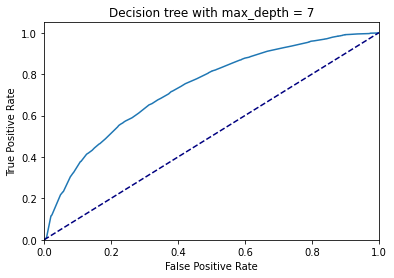

In [24]:
# Using decision tree classifier
from sklearn import tree # Decision tree algo

# Split training set with KFoldValidation
kf_two = KFold(n_splits = 10)
kFolds_two = kf_two.split(Xtrain)

# Set 'max_depth' in decision tree algo, declare dictionary to hold AUROC values {max_depth : auroc}
mdepth = 1
aurocs_two = {}


# Use kFold technique on training set to test models with different values of max_depth starting at 3
for train_index, test_index in kFolds_two:
    mdepth += 2
    model_two = tree.DecisionTreeClassifier(max_depth=mdepth)
    model_two.fit(Xtrain[train_index], Ytrain[train_index][:,0])
    predictions_two = model_two.predict_proba(Xtrain[test_index])
    val_two = sklearn.metrics.roc_auc_score(Ytrain[test_index], predictions_two[:,1])
    print(f'Validation AUROC for Decision Tree with max_depth = {mdepth}: {val_two}')
    aurocs_two[mdepth] = val_two
    
# Choose optimized max_depth and evaulate AUROC value on the untouched validation set (note: not the same validation set used in kFolds technique)
model_two = tree.DecisionTreeClassifier(max_depth=max(aurocs_two, key=aurocs_two.get)) # Set model with optimized max_depth value
model_two.fit(Xtrain[train_index], Ytrain[train_index][:,0]) # Fit model on the training set
predictions_two = model_two.predict_proba(Xvalid) # Predict on validation set
val_two = sklearn.metrics.roc_auc_score(Yvalid, predictions_two[:,1]) # Calculate AUROC value
print(f'Max AUROC value at max_depth = {max(aurocs_two, key=aurocs_two.get)}. AUROC value with optimized kValue on validation set = {val_two}') # Print AUROC value on untouched validation set

# Plot ROC curve.
fpr_two, tpr_two, thresholds_two = sklearn.metrics.roc_curve(Yvalid, predictions_two[:,1])
plt.plot(fpr_two, tpr_two)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Decision tree with max_depth = {max(aurocs_two, key=aurocs_two.get)}')

# Evaluating Alternate Model (Random Forests)

Validation AUROC for Random Forest with max_depth = 3: 0.7218350970029199
Validation AUROC for Random Forest with max_depth = 5: 0.7409157510117638
Validation AUROC for Random Forest with max_depth = 7: 0.7745082695754627
Validation AUROC for Random Forest with max_depth = 9: 0.7787255053576294
Validation AUROC for Random Forest with max_depth = 11: 0.7713777600513774
Validation AUROC for Random Forest with max_depth = 13: 0.7794326680858003
Validation AUROC for Random Forest with max_depth = 15: 0.7837423025810919
Validation AUROC for Random Forest with max_depth = 17: 0.7871029333197233
Validation AUROC for Random Forest with max_depth = 19: 0.793088013044601
Validation AUROC for Random Forest with max_depth = 21: 0.7807823187335883
Validation AUROC for Random Forest with max_depth = 19 and n_estimators = 100: 0.7750206828554534
Validation AUROC for Random Forest with max_depth = 19 and n_estimators = 120: 0.7803935393906352
Validation AUROC for Random Forest with max_depth = 19 and 

Text(0.5, 1.0, 'Random Forest with max_depth = 19 and n_estimators = 260')

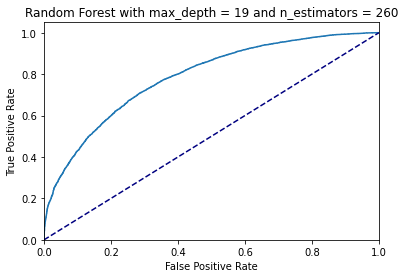

In [25]:
# Using decision tree classifier
from sklearn.ensemble import RandomForestClassifier

# Split training set with KFoldValidation
kf_two = KFold(n_splits = 10)
kFolds_two = kf_two.split(Xtrain)

# Set 'max_depth' in random forest algo, declare dictionary to hold AUROC values {max_depth : auroc}
mdepth = 1
aurocs_two = {}


# Use kFold technique on training set to test models with different values of max_depth starting at 3
for train_index, test_index in kFolds_two:
    mdepth += 2
    model_two = RandomForestClassifier(max_depth=mdepth)
    model_two.fit(Xtrain[train_index], Ytrain[train_index][:,0])
    predictions_two = model_two.predict_proba(Xtrain[test_index])
    val_two = sklearn.metrics.roc_auc_score(Ytrain[test_index], predictions_two[:,1])
    print(f'Validation AUROC for Random Forest with max_depth = {mdepth}: {val_two}')
    aurocs_two[mdepth] = val_two

# Assign a variable to the max_depth value that gave the best AUROC value
bestDepth = max(aurocs_two, key=aurocs_two.get)

n_est = 80 # n_estimators, the next hyperparameter that will be tested
aurocs_est = {} # Declare a dictionary to hold {n_estimators : auroc}

# Redo training set split with KFoldValidation to test the hyperparameter 'n_estimators'
kf_two = KFold(n_splits = 10)
kFolds_two = kf_two.split(Xtrain)

# Use kFold technique on training set to test models with different values of n_estimators starting at 100
# In this iteration we will be using the optimized value of max_depth found in the previous iteration
for train_index, test_index in kFolds_two:
    n_est += 20
    model_two = RandomForestClassifier(max_depth=bestDepth, n_estimators=n_est)
    model_two.fit(Xtrain[train_index], Ytrain[train_index][:,0])
    predictions_two = model_two.predict_proba(Xtrain[test_index])
    val_two = sklearn.metrics.roc_auc_score(Ytrain[test_index], predictions_two[:,1])
    print(f'Validation AUROC for Random Forest with max_depth = {bestDepth} and n_estimators = {n_est}: {val_two}')
    aurocs_est[n_est] = val_two # {n_est : auroc}

# Assign a variable to the n_estimators value that gave the best AUROC value
bestEst = max(aurocs_est, key=aurocs_est.get)
    
# Use optimized hyperparameters and evaulate AUROC value on the untouched validation set (note: not the same validation set used in kFolds technique)
model_two = RandomForestClassifier(max_depth=bestDepth, n_estimators=bestEst) # Set model with optimized hyperparameter values
model_two.fit(Xtrain[train_index], Ytrain[train_index][:,0]) # Fit model on the training set
predictions_two = model_two.predict_proba(Xvalid) # Predict on validation set
val_two = sklearn.metrics.roc_auc_score(Yvalid, predictions_two[:,1]) # Calculate AUROC value
print(f'Max AUROC value at max_depth = {bestDepth} and n_estimators = {bestEst}. AUROC value with optimized kValue on validation set = {val_two}') # Print AUROC value on untouched validation set

# Plot ROC curve.
fpr_two, tpr_two, thresholds_two = sklearn.metrics.roc_curve(Yvalid, predictions_two[:,1])
plt.plot(fpr_two, tpr_two)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Random Forest with max_depth = {bestDepth} and n_estimators = {bestEst}')

# Evaluating Alternate Model (Gradient Boosting)

Validation AUROC for Gradient Boosting with max_depth = 3: 0.7745827700997365
Validation AUROC for Gradient Boosting with max_depth = 5: 0.7847777396254902
Validation AUROC for Gradient Boosting with max_depth = 7: 0.8030135252319743
Validation AUROC for Gradient Boosting with max_depth = 9: 0.796262633940741
Validation AUROC for Gradient Boosting with max_depth = 11: 0.7730616951985545
Validation AUROC for Gradient Boosting with max_depth = 13: 0.786815049113632
Validation AUROC for Gradient Boosting with max_depth = 15: 0.7875848961314322
Validation AUROC for Gradient Boosting with max_depth = 17: 0.7841879020641105
Validation AUROC for Gradient Boosting with max_depth = 19: 0.7774127334284939
Validation AUROC for Gradient Boosting with max_depth = 21: 0.7232289111995891
Validation AUROC for Gradient Boosting with max_depth = 7 and n_estimators = 100: 0.7821338151247724
Validation AUROC for Gradient Boosting with max_depth = 7 and n_estimators = 120: 0.7877353792279141
Validation AUR

Text(0.5, 1.0, 'Gradient Boosting with max_depth = 7 and n_estimators = 140')

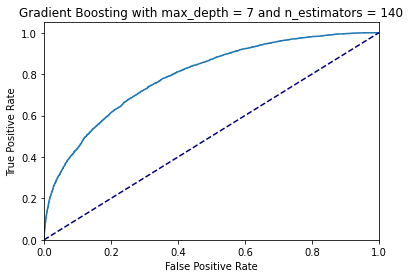

In [26]:
# Using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# Split training set with KFoldValidation
kf_two = KFold(n_splits = 10)
kFolds_two = kf_two.split(Xtrain)

# Set 'max_depth' in random gradient boosting algo, declare dictionary to hold AUROC values {max_depth : auroc}
mdepth = 1
aurocs_two = {}


# Use kFold technique on training set to test models with different values of max_depth starting at 3
for train_index, test_index in kFolds_two:
    mdepth += 2
    model_two = GradientBoostingClassifier(max_depth=mdepth)
    model_two.fit(Xtrain[train_index], Ytrain[train_index][:,0])
    predictions_two = model_two.predict_proba(Xtrain[test_index])
    val_two = sklearn.metrics.roc_auc_score(Ytrain[test_index], predictions_two[:,1])
    print(f'Validation AUROC for Gradient Boosting with max_depth = {mdepth}: {val_two}')
    aurocs_two[mdepth] = val_two

# Assign a variable to the max_depth value that gave the best AUROC value
bestDepth = max(aurocs_two, key=aurocs_two.get)

n_est = 80 # n_estimators, the next hyperparameter which will be tested
aurocs_est = {} # Declare a dictionary to hold {n_estimators : auroc}

# Redo training set split with KFoldValidation to test the hyperparameter 'n_estimators'
kf_two = KFold(n_splits = 10)
kFolds_two = kf_two.split(Xtrain)

# Use kFold technique on training set to test models with different values of n_estimators starting at 100
# In this iteration we will be using the optimized value of max_depth found in the previous iteration
for train_index, test_index in kFolds_two:
    n_est += 20
    model_two = GradientBoostingClassifier(max_depth=bestDepth, n_estimators=n_est)
    model_two.fit(Xtrain[train_index], Ytrain[train_index][:,0])
    predictions_two = model_two.predict_proba(Xtrain[test_index])
    val_two = sklearn.metrics.roc_auc_score(Ytrain[test_index], predictions_two[:,1])
    print(f'Validation AUROC for Gradient Boosting with max_depth = {bestDepth} and n_estimators = {n_est}: {val_two}')
    aurocs_est[n_est] = val_two # {n_est : auroc}

# Assign a variable to the n_estimators value that gave the best AUROC value
bestEst = max(aurocs_est, key=aurocs_est.get)
    
# Use optimized hyperparameters and evaulate AUROC value on the untouched validation set (note: not the same validation set used in kFolds technique)
model_two = GradientBoostingClassifier(max_depth=bestDepth, n_estimators=bestEst) # Set model with optimized hyperparameter values
model_two.fit(Xtrain[train_index], Ytrain[train_index][:,0]) # Fit model on the training set
predictions_two = model_two.predict_proba(Xvalid) # Predict on validation set
val_two = sklearn.metrics.roc_auc_score(Yvalid, predictions_two[:,1]) # Calculate AUROC value
print(f'Max AUROC value at max_depth = {bestDepth} and n_estimators = {bestEst}. AUROC value with optimized kValue on validation set = {val_two}') # Print AUROC value on untouched validation set

# Plot ROC curve.
fpr_two, tpr_two, thresholds_two = sklearn.metrics.roc_curve(Yvalid, predictions_two[:,1])
plt.plot(fpr_two, tpr_two)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Gradient Boosting with max_depth = {bestDepth} and n_estimators = {bestEst}')

# Make Predictions and Prepare Submission File

# Evaluating Ensemble Model (Bootstrap Aggregating)

In [ ]:
# Using gradient boosting classifier
from sklearn.ensemble import BaggingClassifier

n_est = 0 # n_estimators, the hyperparameter which will be optimized
aurocs_est = {} # Declare a dictionary to hold {n_estimators : auroc}

# Training set split with KFoldValidation to test the hyperparameter 'n_estimators'
kf_two = KFold(n_splits = 10)
kFolds_two = kf_two.split(Xtrain)

# Use kFold technique on training set to test models with different values of n_estimators starting at 10
# In this iteration we will be using the optimized value of max_depth found in the previous iteration
for train_index, test_index in kFolds_two:
    n_est += 10
    my_ensemble = BaggingClassifier(base_estimator=model_two, n_estimators=n_est)
    my_ensemble.fit(Xtrain[train_index], Ytrain[train_index][:,0])
    predictions_two = my_ensemble.predict_proba(Xtrain[test_index])
    val_two = sklearn.metrics.roc_auc_score(Ytrain[test_index], predictions_two[:,1])
    print(f'Validation AUROC for Bagging Classifier with base_estimator = {model_two} and n_estimators = {n_est}: {val_two}')
    aurocs_est[n_est] = val_two # {n_est : auroc}

# Assign a variable to the n_estimators value that gave the best AUROC value
bestEst = max(aurocs_est, key=aurocs_est.get)
    
# Use optimized hyperparameters and evaulate AUROC value on the untouched validation set (note: not the same validation set used in kFolds technique)
my_ensemble = BaggingClassifier(base_estimator=model_two, n_estimators=bestEst) # Set model with optimized hyperparameter values
my_ensemble.fit(Xtrain[train_index], Ytrain[train_index][:,0]) # Fit model on the training set
predictions_two = my_ensemble.predict_proba(Xvalid) # Predict on validation set
val_two = sklearn.metrics.roc_auc_score(Yvalid, predictions_two[:,1]) # Calculate AUROC value
print(f'Max AUROC value at base_estimator = {model_two} and n_estimators = {bestEst}. AUROC value with optimized kValue on validation set = {val_two}') # Print AUROC value on untouched validation set

# Plot ROC curve.
fpr_two, tpr_two, thresholds_two = sklearn.metrics.roc_curve(Yvalid, predictions_two[:,1])
plt.plot(fpr_two, tpr_two)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Bagging Classifier with base_estimator = {model_two} and n_estimators = {bestEst}')

Validation AUROC for Bagging Classifier with base_estimator = GradientBoostingClassifier(max_depth=7, n_estimators=140) and n_estimators = 10: 0.7858124789401987
Validation AUROC for Bagging Classifier with base_estimator = GradientBoostingClassifier(max_depth=7, n_estimators=140) and n_estimators = 20: 0.7919131639371763
Validation AUROC for Bagging Classifier with base_estimator = GradientBoostingClassifier(max_depth=7, n_estimators=140) and n_estimators = 30: 0.810394116000773
Validation AUROC for Bagging Classifier with base_estimator = GradientBoostingClassifier(max_depth=7, n_estimators=140) and n_estimators = 40: 0.8085558252427185
Validation AUROC for Bagging Classifier with base_estimator = GradientBoostingClassifier(max_depth=7, n_estimators=140) and n_estimators = 50: 0.7897593520884043


In [9]:
# Choose final model and make probabilistic predictions.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import numpy as np

model_two = GradientBoostingClassifier(max_depth=7, n_estimators=140)
model_two.fit(Xtrain, Ytrain[:,0])

my_ensemble = BaggingClassifier(base_estimator=model_two, n_estimators=30)
my_ensemble.fit(Xtrain, Ytrain[:,0])

# Make predictions and submit file 
filename = 'test.csv' 
Xtest1 = np.loadtxt(filename, skiprows=1, delimiter=',', usecols=range(1,29))
predictions = my_ensemble.predict_proba(Xtest1) # Choose the best model
predictions = predictions[:,1:2] # Predictions has two columns. Get probability that label=1.
N = predictions.shape[0]
assert N == 50000, "Predictions should have length 50000."
submission = np.hstack((np.arange(N).reshape(-1,1), predictions)) # Add Id column.
np.savetxt(fname='submission.csv', X=submission, header='Id,Predicted', delimiter=',', comments='')

# If running on Kaggle.com, submission.csv can be downloaded from this Kaggle Notebook under Sessions->Data->output->/kaggle/working.
model_two

GradientBoostingClassifier(max_depth=7, n_estimators=140)